In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/chenhong/Desktop/data analysis/car_purchasement_classification/car_data.csv')
df.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

In [4]:
df.info

<bound method DataFrame.info of      User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]>

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [7]:
df = df.drop('User ID', axis='columns')

In [8]:
df.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [9]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [10]:
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [11]:
df['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

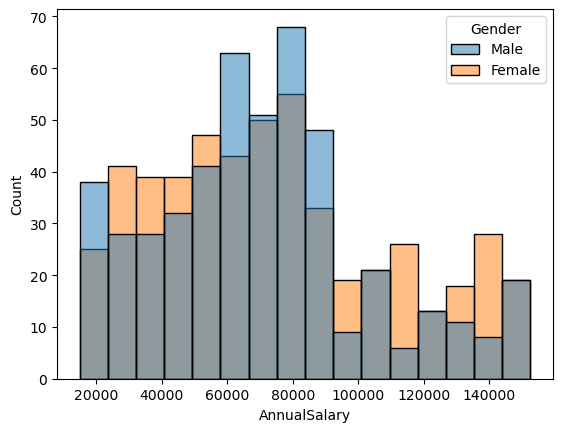

In [12]:
sns.histplot(x ='AnnualSalary', data = df, hue = 'Gender')
#woman are more than man

<AxesSubplot:xlabel='Age', ylabel='Count'>

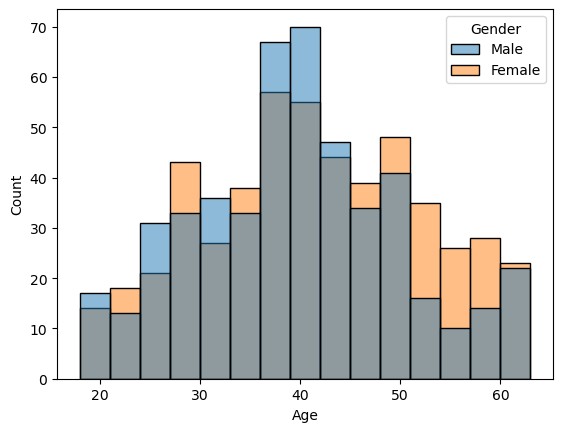

In [13]:
sns.histplot(x ='Age', data = df, hue = 'Gender')

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

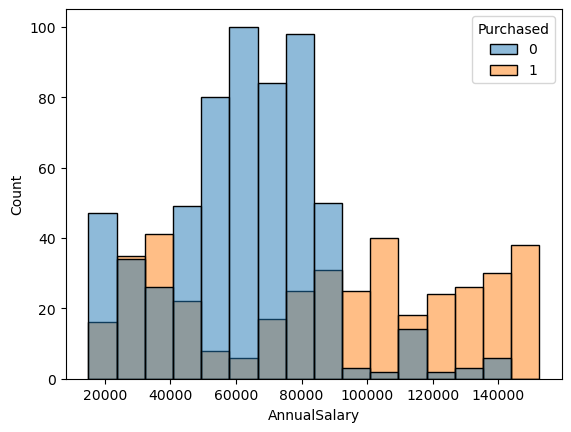

In [14]:
sns.histplot(x='AnnualSalary',data= df, hue='Purchased')

<AxesSubplot:xlabel='Age', ylabel='Count'>

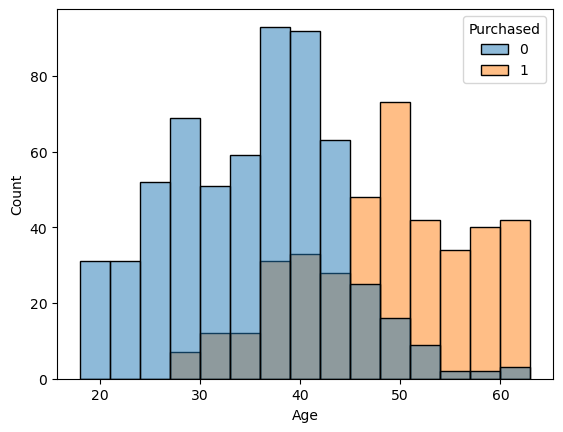

In [15]:
sns.histplot(x='Age',data= df, hue='Purchased')
#age has some connections with purchased

--------feature engineering-----------

get_dummies()将Series转换为虚拟代码。
from_dummies()将虚拟代码转换为Dataframe

In [16]:
df = pd.get_dummies(df,drop_first = False)
df.head()

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,35,20000,0,0,1
1,40,43500,0,0,1
2,49,74000,0,0,1
3,40,107500,1,0,1
4,25,79000,0,0,1


In [17]:
df = df.drop('Gender_Male', axis='columns')

In [18]:
x = df[['AnnualSalary','Age','Gender_Female']].copy()
y = df[['Purchased']].copy()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.fit_transform(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
def modelperformance(prediction):
    print('Accuracy score in model in {}'.format(accuracy_score(y_test,prediction)))

-------MACHINE LEARNING---------

In [23]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train.values.ravel())
log_prediction = log_model.predict(scaled_X_test)
modelperformance(log_prediction)

Accuracy score in model in 0.8266666666666667


In [24]:
from sklearn.neighbors import KNeighborsClassifier
test_errors=[]
for k in range(1,30):
    knm_model = KNeighborsClassifier(n_neighbors=k)
    knm_model.fit(scaled_X_train,y_train.values.ravel())
    knm_pred = knm_model.predict(scaled_X_test)
    test_error_rate = 1 - accuracy_score(y_test,knm_pred)
    test_errors.append(test_error_rate)

/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

In [25]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'K Neighbors')

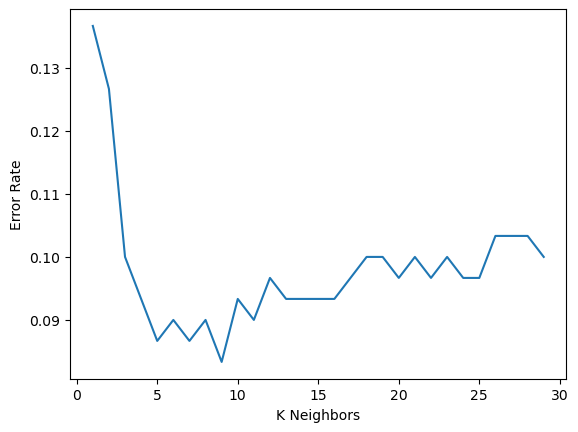

In [26]:
plt.plot(range(1,30),test_errors)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [27]:
knm_elbowmethod = KNeighborsClassifier(n_neighbors=12)
knm_elbowmethod.fit(scaled_X_train,y_train.values.ravel())
knm_pred = knm_model.predict(scaled_X_test)
modelperformance(knm_pred)

Accuracy score in model in 0.9


/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps=[('knm',knn)])
param_gird={'knm_n_neighbors':k_values}
cv_classifier = GridSearchCV(pipe,param_gird,cv=5,scoring='accuracy')
cv_classifier

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knm', KNeighborsClassifier())]),
             param_grid={'knm_n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                             12, 13, 14, 15, 16, 17, 18, 19, 20,
                                             21, 22, 23, 24, 25, 26, 27, 28,
                                             29]},
             scoring='accuracy')

In [37]:
cv_classifier.fit(scaled_X_train,y_train.values.ravel())
print(cv_classifier.best_params_)

ValueError: Invalid parameter knm_n_neighbors for estimator Pipeline(steps=[('knm', KNeighborsClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
pred_gridknm = cv_classifier.predict(scaled_X_test)
modelperformance(pred_gridknm)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

---------MACHINE LEARNING PT2--------

In [32]:
from sklearn.svm import SVC
svm = SVC()
param_gird_svr = {'C':[0.01,0.1,0.5,1],'kernel':['linear','rbf','poly']}
gridsvr = GridSearchCV(svm,param_gird_svr)

In [38]:
gridsvr.fit(scaled_X_train,y_train.values.ravel())
pred_svr = gridsvr.predict(scaled_X_test)
modelperformance(pred_svr)

Accuracy score in model in 0.89


In [39]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(scaled_X_train,y_train.values.ravel())


DecisionTreeClassifier()

In [40]:
tree_pred =  treemodel.predict(scaled_X_test)
modelperformance(tree_pred)

Accuracy score in model in 0.8466666666666667


In [42]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [32,63,128,256]
max_features = [2,3,4]
bootstrap = [True,False]
param_gird = [True,False]
param_gird_rfr = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap}
gridrfr = GridSearchCV(rfr_model,param_gird_rfr)
gridrfr.fit(scaled_X_train,y_train.values.ravel())

/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(ite

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 63, 128, 256]})

In [45]:
print(gridrfr.best_params_)

{'bootstrap': True, 'max_features': 2, 'n_estimators': 63}


In [46]:
rfc = RandomForestClassifier(max_features=3,n_estimators=256,oob_score=True)

In [49]:
rfc.fit(scaled_X_train,y_train.values.ravel())
pred_rfc = rfc.predict(scaled_X_test)
modelperformance(pred_rfc)


Accuracy score in model in 0.8566666666666667
